# Transformations Tutorial 

This tutorial demonstrates the use of linear transformations using Python. We assume you have read the reading material for this week prior to starting the tutorial.

The tutorial covers the following topics:

1. Rotation, scaling and shearing of one and several points. 
2. Rotations around a point.
3. 3D rotations and scaling. 
4. Show by example, that matrix multiplication (generally) does not commute ($AB \neq BA$).
5. Affine transformation in Euclidean coordinates.
6. Transforming between Euclidean and homogeneous coordinates.
7. Affine transformations using homogeneous coordinates.

Recall that linear transformations ($Ax=y$) leave the origin fixed and preserve parallelism. Scaling, shearing, rotation and reflection are examples of linear transformations. Affine transformations ($Ax + b = y$) are like linear transformations, but also allow for translation. Affine transformations can also be formulated as a matrix multiplication using homogeneous coordinates.

##  Vector and matrix of points

Define a point $x=\begin{bmatrix} 1 \\ 2 \end{bmatrix} \in \mathbb{R}^2$ and a data matrix $A =\begin{bmatrix} 0 & 1 & 0 & -1\\
1 & -1 & -1 & 0 \end{bmatrix} \in \mathbb{R}^{2\times 4}$, where each column is considered a separate point:

In [ ]:
import numpy as np

# single 2d point
x = np.array([1, 2])

# matrix with column vectors of points
A = np.array([[0, 1],
              [1, 0],
              [0, -1],
              [-1, 0]]).T

print("x=", x)
print("A=\n", A)


## 2D Transformations and matrix multiplication 

The following steps involve only 2D to 2D transformations. Let $x, x'$ $\in \mathbb{R}^2$ be vectors and $T \in \mathbb{R}^{2x2}$ the transformation matrix. Linearly transforming $x$ to $x'$ is achieved through matrix multiplication $Tx=x'$. In the following steps we will investigate specific choices of $T$, where subscript $T_R$, $T_{SC}$ and $T_{S}$ represent which type of transformation it is eg. rotation, scaling and shearing. 
 
The function below visualizes points before and after a transformation: 

In [2]:
#| id: rotation_plot

#import libraries
import matplotlib.pyplot as plt
import numpy as np
import math
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)


def plot_points(points, t_points, origin=(0, 0)):
    """
    Displays the points and t_points in separate subplots and where the points with the same index have the same color
    
    Args:
        points: matrix of 2D points.
        t_points: matrix of transformed 2D points.
        origin: it is simply show the origin and is (0,0) by default.
    """
    color_lut = 'rgbcmy'
    fig, (ax1, ax2) = plt.subplots(1, 2)
    xs_t = []
    ys_t = []
    xs = []
    ys = []
    i = 0

    text_offset = 0.15
    ax1.scatter(origin[0], origin[1], color='k')
    ax1.text(origin[0] + text_offset, origin[1], "o")
    ax2.scatter(origin[0], origin[1], color='k')
    ax2.text(origin[0] + text_offset, origin[1], "o")

    for row, t_row in zip(points.T, t_points.T):
        x_s, y_s = row
        x_s_t, y_s_t = t_row
        xs.append(x_s)
        ys.append(y_s)
        xs_t.append(x_s_t)
        ys_t.append(y_s_t)
        c_s = color_lut[i]  # these are the same but, its good to be explicit
        ax1.scatter(x_s, y_s, color=c_s)
        ax1.text(x_s + text_offset, y_s, str(i))
        ax2.scatter(x_s_t, y_s_t, color=c_s)
        ax2.text(x_s_t + text_offset, y_s_t, str(i))
        i += 1
    xs.append(xs[0])
    ys.append(ys[0])
    xs_t.append(xs_t[0])
    ys_t.append(ys_t[0])
    ax1.plot(xs, ys, color="gray", linestyle='dotted')
    ax1.set_xticks(np.arange(-2.5, 3, 1))
    ax1.set_yticks(np.arange(-2.5, 4, 1))
    ax2.plot(xs_t, ys_t, color="gray", linestyle='dotted')
    ax2.set_xticks(np.arange(-2.5, 3, 1))
    ax2.set_yticks(np.arange(-2.5, 4, 1))
    ax1.grid()
    ax2.grid()
    plt.show()

### Scaling

Let $T_{SC} = 
	\begin{bmatrix}
		s_x & 0\\
		0 & s_y
	\end{bmatrix}$ be a SCaling matrix such that $x'=T_{SC} x$ scales $x_1$ with $s_x$ and $x_2$ with $s_y$. The following example scales (anisotropically)  the first coordinate  with $2$ and the second coordinate with $3$.  


In [ ]:
# scaling transformation 
T_SC = np.array([[2, 0], [0, 3]])
x_prime = T_SC @ x
print("original point: \n", x)
print("scaled point: \n", x_prime)

Apply scaling transformation $T_{SC}$ to the matrix $A$ ( $A_s=T_{SC}A$ ). Transforming the points in the columns of $A$ is achieved by multipying $A$ by $T_{SC}$ (notice the order of the multiplication)
$$A_s=T_{SC}A$$ 

In [ ]:
#| id: scaling_plot
A_s = T_SC @ A
plot_points(A, A_s)

### Shearing 

Define shearing matrices $T_{Sx}$ and $T_{Sy}$ as

$$T_{Sx} = 
	\begin{bmatrix}
		1 & sh_x\\
		0 & 1
	\end{bmatrix}
\,\quad T_{Sy} =
	\begin{bmatrix}
		1 & 0\\
		sh_y & 1
	\end{bmatrix},
 $$

where  $T_{Sx}$ is a horizontal shear and $T_{Sy}$ is a vertical shear (with shearing factors $sh_x$ and $sh_y$ respectively). The cell below demonstrates the transformations:


In [ ]:
#| id: shear_plot
# Horizontal shear 
T_Sx = np.array([[1, 1], [0, 1]])
print('Horizontal shear \n', T_Sx)
x_sx = T_Sx.dot(A)
plot_points(A, x_sx)

# Vertical shear 
T_Sy = np.array([[1, 0], [1, 1]])
x_sy = T_Sy.dot(A)
print('Vertical shear \n', T_Sy)
plot_points(A, x_sy)

### Rotation
The rotation matrix $T_R$ around the origin is given by:

$$T_R = 
	\begin{bmatrix}
		\cos(\theta) & -\sin(\theta)\\
		\sin(\theta) & \cos(\theta)
	\end{bmatrix},
	$$

where $\theta$ is the (anticlockwise) rotation angle around the origin $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$ as illustrated in the code cell below:

In [ ]:
# Rotation with angle theta
angle = 30
theta = np.radians(angle)
T_R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

#Rotation of a single point using matrix multiplication
x_prime = T_R @ x

print('Rotation matrix \n', T_R)
print(x)
print("Rotated P", x_prime)

#Rotation of multiple points using matrix multiplication
A_prime = T_R @ A  #rotate the points in A around the origin through matrix multiplication with T_r

print("Points before rotation \n", A)  #Printing such that each point is on one row.. Hence transposing the matrix
print("Points after rotation \n", A_prime.T)

The following cell visualizes the transformations $T_{R}A=A'$, where $A$ is the dataset from above. 

In [ ]:
plot_points(A,A_prime)

## 2D Rotation about a point

The following steps are needed to transform  a point $x$ (or matrix of points $A$) around an arbitrary point $p$

1. Translate the point(s) by $p$ (e.g. $A_1=A-p$)  
2. Transform translated points $A_2= TA_1$. 
3. Undo the translation by moving the points back $A_3=A_2+p$

The following example shows a 30-degree rotation of matrix $A$ around point $p=\begin{bmatrix}1\\1\end{bmatrix}$:
      

In [ ]:
#| id: rotation_point_plot
# centered point
p = np.array([1, 1])

# Rotation around a point

# STEP 1: translation to the point 
# np.newaxis is used to add an additional axis to an array and reshapes p into a column vector.
A_1 = A - p[:, np.newaxis]

# STEP 2: rotate
A_2 = T_R.dot(A_1)

# STEP 3: reverse translation
A_3 = A_2 + p[:, np.newaxis]

#plot
plot_points(A, A_3, p)

##  3D (Geometric) Transformations


###  Matrix of points

Similar to 2D transformations, define a data matrix 
$A =\begin{bmatrix} 0 & 1 & 0 & -31\\
2 & 0 & -1 & 0 \\ 
0 & 0 & 0 & 0\end{bmatrix}$ 
of columns of three-dimensional points:


In [ ]:
#  3d points 
a, b, c, d = [0, 2, 0], [1, 0, 0], [0, -1, 0], [-3, 0, 0]

# matrix with row vectors of points
A = np.array([a, b, c, d]).T
print('A=', A)

### 3D Rotation
The following three rotation matrices, rotate points by an angle θ about the x-axis, y-axis, and z-axis in three dimensions:

$$Rx = 
	\begin{bmatrix}
		1 & 0 & 0 \\
		0 & \cos(\theta) & -\sin(\theta) \\
        0 &  \sin(\theta) & \cos(\theta) \\
	\end{bmatrix}
,\quad
Ry = 
\begin{bmatrix}
    \cos(\theta) & 0 & \sin(\theta) \\
    0 & 1 & 0 \\
    -\sin(\theta) &  0 & \cos(\theta) \\
\end{bmatrix}
,\quad
Rz = 
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) & 0 \\
    \sin(\theta) & \cos(\theta) & 0\\
    0 &  0 & 1 \\
\end{bmatrix}$$

Use the function `get_3d_rotation_matrix` below to construct a 3D rotation matrix.

In [10]:
def get_3d_rotation_matrix(theta, axis=0):
    """
    This function return a rotation matrix given an input theta angle in
    radians.
    """
    if axis == 0:
        return np.array(
            [
                [1, 0, 0],
                [0, math.cos(theta), -math.sin(theta)],
                [0, math.sin(theta), math.cos(theta)],
            ],
            dtype=np.float64,
        )
    elif axis == 1:
        return np.array(
            [
                [math.cos(theta), 0, math.sin(theta)],
                [0, 1, 0],
                [-math.sin(theta), 0, math.cos(theta)],
            ],
            dtype=np.float64,
        )

    return np.array(
        [
            [math.cos(theta), -math.sin(theta), 0],
            [math.sin(theta), math.cos(theta), 0],
            [0, 0, 1],
        ],
        dtype=np.float64,
    )

The following example applies 3D rotation matrices $R_x$, $R_y$, and $R_z$ (representing rotations around the x, y, and z axes, respectively) to transform the points (columns) in $A$, eg. $A'=R_xA$.

In [ ]:
#rotation angle
angle = 60 #degrees
theta = np.radians(angle) #radians

#3d rotation around X-axis
R_x = get_3d_rotation_matrix(theta, axis=0)
print('3d rotation  over X-axis', angle, 'degrees \n', R_x)
P_rx = np.dot(R_x, A)

#3d rotation  around Y-axis
R_y = get_3d_rotation_matrix(theta, axis=1)
print('3d rotation  over Y-axis', angle, 'degrees \n', R_y)
P_ry = np.dot(R_y, A)

#3d rotation  around Z-axis
R_z = get_3d_rotation_matrix(theta, axis=2)
print('3d rotation  over Z-axis', angle, 'degrees \n', R_z)
P_rz = np.dot(R_z, A)


### Function for 3D plotting

The following function is used to plot points in 3D. The details of this method are not essential for the core concepts of the tutorial. 

In [12]:
def plot3d_points(points, t_points, view_point=45):
    """This function get a matrix of 3D points and transformed points and them in separate subplots.
    The details are not important for understanding the course material.
    
    Args:
        points: matrix of 3D points
        t_points: matrix of transformed 3D points
        view_point: view point if 3D plot in degree
    """
    color_lut = 'rgbcmy'
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 10), subplot_kw=dict(projection='3d'))
    ax.view_init(elev=45., azim=view_point)
    ax2.view_init(elev=45., azim=view_point)
    
    xs = []
    ys = []
    zs = []

    xs_t = []
    ys_t = []
    zs_t = []
    i = 0
    ax.scatter(0, 0, 0, color='k')
    ax2.scatter(0, 0, 0, color='k')
    for row, t_row in zip(points.T, t_points.T):
        x, y, z = row
        xs.append(x)
        ys.append(y)
        zs.append(z)
        c = color_lut[i]  # these are the same but, its good to be explicit
        ax.scatter(x, y, z, color=c)

        x_t, y_t, z_t = t_row
        xs_t.append(x_t)
        ys_t.append(y_t)
        zs_t.append(z_t)
        c_t = color_lut[i]  # these are the same but, its good to be explicit
        ax2.scatter(x_t, y_t, z_t, color=c_t)

        i += 1

    xs.append(xs[0])
    ys.append(ys[0])
    zs.append(zs[0])
    ax.plot(xs, ys, zs, color="gray", linestyle='dotted')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xticks(np.arange(-2.5, 3, 0.5))
    ax.set_yticks(np.arange(-2.5, 3, 0.5))
    ax.set_zticks(np.arange(-2.5, 3, 0.5))
    plt.grid()

    xs_t.append(xs_t[0])
    ys_t.append(ys_t[0])
    zs_t.append(zs_t[0])
    ax2.plot(xs_t, ys_t, zs_t, color="gray", linestyle='dotted')
    ax2.set_xlabel('X Label')
    ax2.set_ylabel('Y Label')
    ax2.set_zlabel('Z Label')
    ax2.set_xticks(np.arange(-2.5, 3, 0.5))
    ax2.set_yticks(np.arange(-2.5, 3, 0.5))
    ax2.set_zticks(np.arange(-2.5, 3, 0.5))
    plt.grid()

    plt.show()

`plot3d_points` is used to plot the points $A$ and rotated points $P_{rx}$, $P_{ry}$ and $P_{rz}$.

In [ ]:
#3d rotation  over X-axis
print('3D rotation  over X-axis', angle, 'degrees \n')
plot3d_points(A, P_rx)

#3d rotation  over Y-axis
print('3D rotation  over Y-axis', angle, 'degrees \n')
plot3d_points(A, P_ry)

#3d rotation  over Z-axis
print('3D rotation  over Z-axis', angle, 'degrees \n')
plot3d_points(A, P_rz)

### 3D scaling

The scaling matrix ($S$) in three dimensions is given by:

$$S = \begin{bmatrix}
		s_x & 0 & 0\\
		0 & s_y & 0 \\
        0 & 0 & s_z
	\end{bmatrix}
,$$

Three 3D-points are transformed with the scaling matrix and plotted with the original points for reference. 

In [ ]:
# 3D points 
a, b, c = (1, 0,0), (0, 1,0), (0, 0,1)

# Matrix with row vectors of points
A = np.array([a, b, c]).T

# 3D-Scaling  
T_3d_s=np.array([[2,0,0],[0,1,0],[0,0,3]])
print('3d Scaling \n',T_3d_s)
P_3d_s=np.dot(T_3d_s,A)
plot3d_points(A,P_3d_s)

### Commutative property in 3D rotation
The composition of 3D rotations is generally not commutative (the order of the matrices in the composition matter). 
The example below shows how compositions of different rotation matrices will give different results:

In [ ]:
#Commutative property 
T_1 = R_z.dot(R_y).dot(R_x)
T_2 = R_x.dot(R_y).dot(R_z)
T_3 = R_x.dot(R_z).dot(R_y)

print("T_1=R_z*R_y*R_x")
plot3d_points(A, np.dot(T_1, A))

print("T_2=R_x*R_y*R_z")
plot3d_points(A, np.dot(T_2, A))

print("T_3=R_x*R_z*R_y")
plot3d_points(A, np.dot(T_3, A))

Compositions of 3D rotations around the same axis *are commutative*, as shown in the cell below.

In [ ]:
#Commutative property in rotations over the same axis
#3d rotation  over X-axis
angle_1 = np.radians(30)
angle_2 = np.radians(50)
angle_3 = np.radians(70)
R_x1 = get_3d_rotation_matrix(angle_1, axis=0)
R_x2 = get_3d_rotation_matrix(angle_2, axis=0)
R_x3 = get_3d_rotation_matrix(angle_3, axis=0)

#building different ordering of rotations 
T_1 = R_x1.dot(R_x2).dot(R_x3)
T_2 = R_x2.dot(R_x1).dot(R_x3)
T_3 = R_x3.dot(R_x2).dot(R_x1)

print("T_1=R_x1*R_x2*R_x3")
plot3d_points(A, np.dot(T_1, A))

print("T_2==R_x2*R_x1*R_x3")
plot3d_points(A, np.dot(T_2, A))

print("T_3==R_x3*R_x2*R_x1")
plot3d_points(A, np.dot(T_3, A))

## Commutativity of translation and rotation in 2D
The cell below defines data matrix $A =\begin{bmatrix} 0 & 1 & 0 & -1\\
              1 & -1 & -1 & 0 \end{bmatrix}$, where each column contains a point:

In [17]:
# points a, b, c and d
a, b, c, d = (0, 1), (1, 0), (0, -1), (-1, 0)

# matrix with row vectors of points
A = np.array([a, b, c, d]).T

The following cell applies a rotation of $90^\circ$ then a translates the points $a,b,c$ and $d$ by the vector $p$ $=$ $\begin{bmatrix}1\\2\end{bmatrix}$: 

In [ ]:
# rotation and translation
p = np.array([[1], [2]])
T_r = np.array([[0, 1], [-1, 0]]).T
p_r = T_r @ A
p_rt = p_r + p
plot_points(A, p_r)
plot_points(p_r, p_rt)

In the following cell, the transformation is a translation followed by a rotation:

In [ ]:
#2- translation and rotation
p_t = A + p
p_tr = T_r @ p_t
plot_points(p_t,p_tr)

#info{Observe how the order of the transformations affects the outputs.} 

### Homogeneous coordinates
Affine transformations ($Ax+b$) can conveniently be expressed as a single matrix multiplication using homogeneous coordinates.

Generally applying the transformation $T$ to a homogeneous 2D point:

$$
\begin{bmatrix}tx'\\ ty'\\ t\end{bmatrix} = T\begin{bmatrix}x\\ y\\1\end{bmatrix}.
$$

The cell below provides the functions `to_homogeneous` and `to_euclidean` to convert points between Euclidean and homogeneous coordinates. Recall that to convert homogeneous coordinates to Euclidean coordinates division by the scaling factor $t$ is necessary:

In [20]:
def to_homogeneous(points):
    """Transform points to homogeneous coordinates."""
    return np.vstack((points, np.ones((1, points.shape[1]))))


def to_euclidean(points):
    """Transform homogeneous points to euclidean points."""
    return points[:2] / points[2]

The cell below transforms the points in the data matrix $A$ to homogeneous coordinates:

In [ ]:
#Affine transformation (rotation nad translation)
print('points in euclidean coordinates \n', A)
A_h = to_homogeneous(A)
print('points in homogeneous coordinates \n', A_h)

The following example illustrates a transformation consisting of a rotation and a translation using homogeneous coordinates:

$$
T=\begin{bmatrix}\cos\theta&-\sin\theta & x_t\\\sin\theta& \cos\theta & y_t\\ 0&0&1\end{bmatrix}
$$

#info{$T$ is a specific affine transformation called a *similarity transform*, which has the property of the scaling factor always being 1.}

The cell below defines an affine transformation $T_A$ and applies it to the homogeneous coordinates of the matrix $A_h$. 

$$
T_A=\begin{bmatrix}0 & -1 & 1 \\ 1 & 0 & 2 \\ 0 & 0 & 1\end{bmatrix}
$$

In [ ]:
#Affine transformation (rotation then translation)
T_A = np.array([[0, 1, 0], [-1, 0, 0], [1, 2, 1]]).T
print('Affine transformation \n', T_A)
A_h_prime = np.dot(T_A, A_h)
print('transformed points in homogeneous coordinate \n', A_h_prime)

Finally, the points are converted from homogeneous coordinates $A'_h$ to Euclidean coordinates by using `to_euclidean`. The points are plotted below:

In [ ]:
A_prime = to_euclidean(A_h_prime)
print('transformed points in euclidean coordinates \n', A_prime)
plot_points(A, A_prime)

#info{
Note the transformed points using affine transformation ($A'$) are exactly the same as points transformed by combination of rotation then translation ($P_{rt}$) in previous example.
}

# Exam

## Week 2A

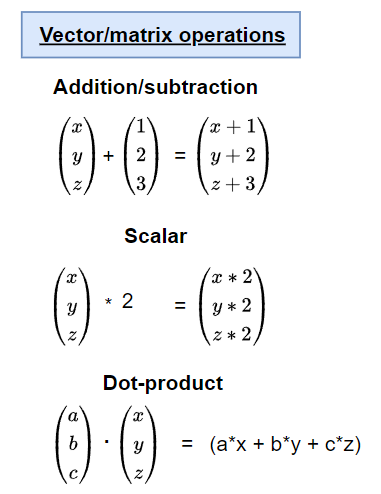

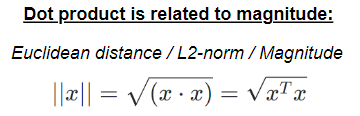

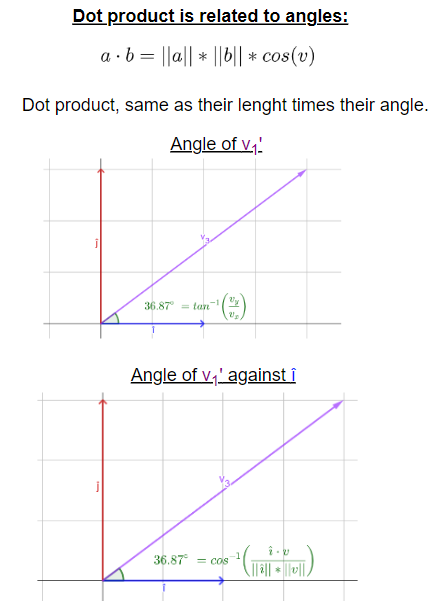

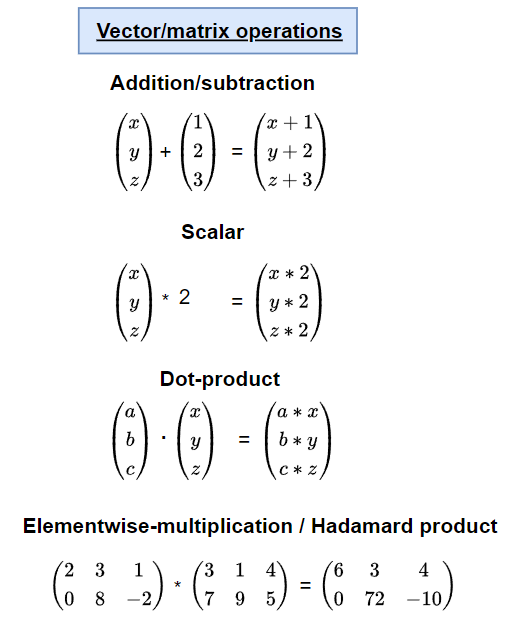

# Week 3

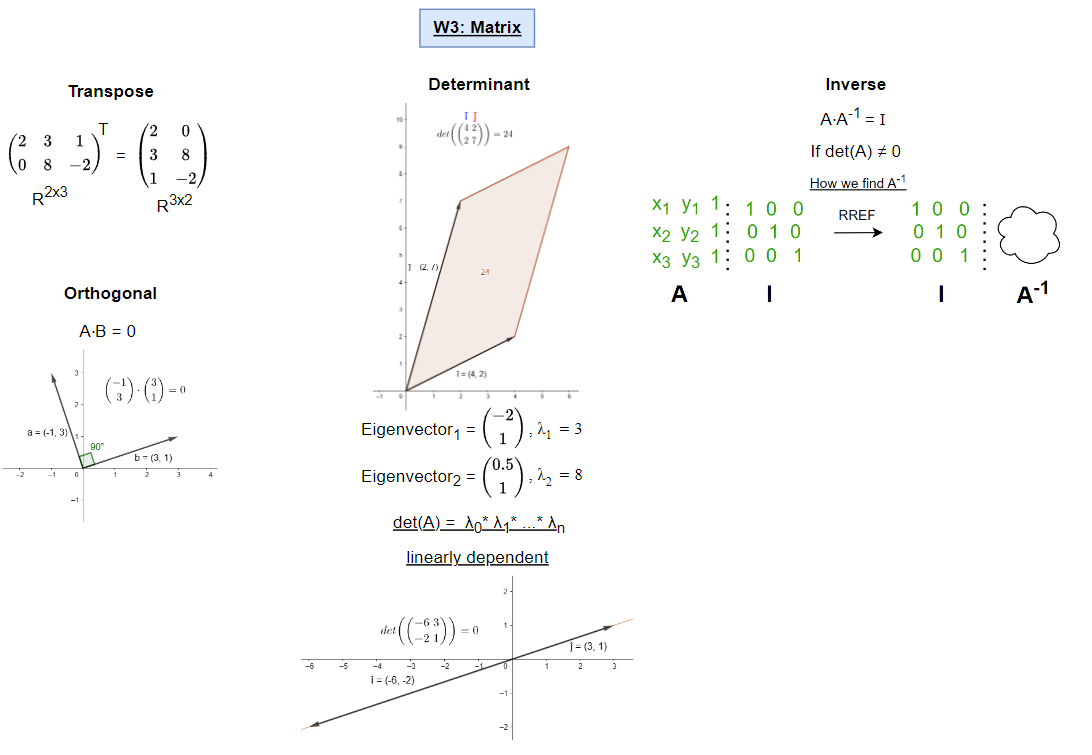

## Week 3B

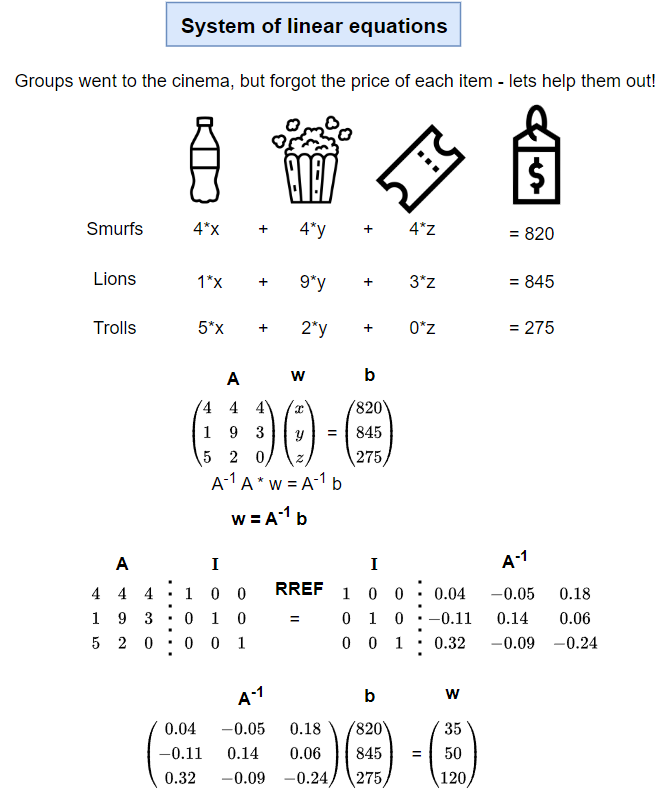

## Week 4A - Linear transformations

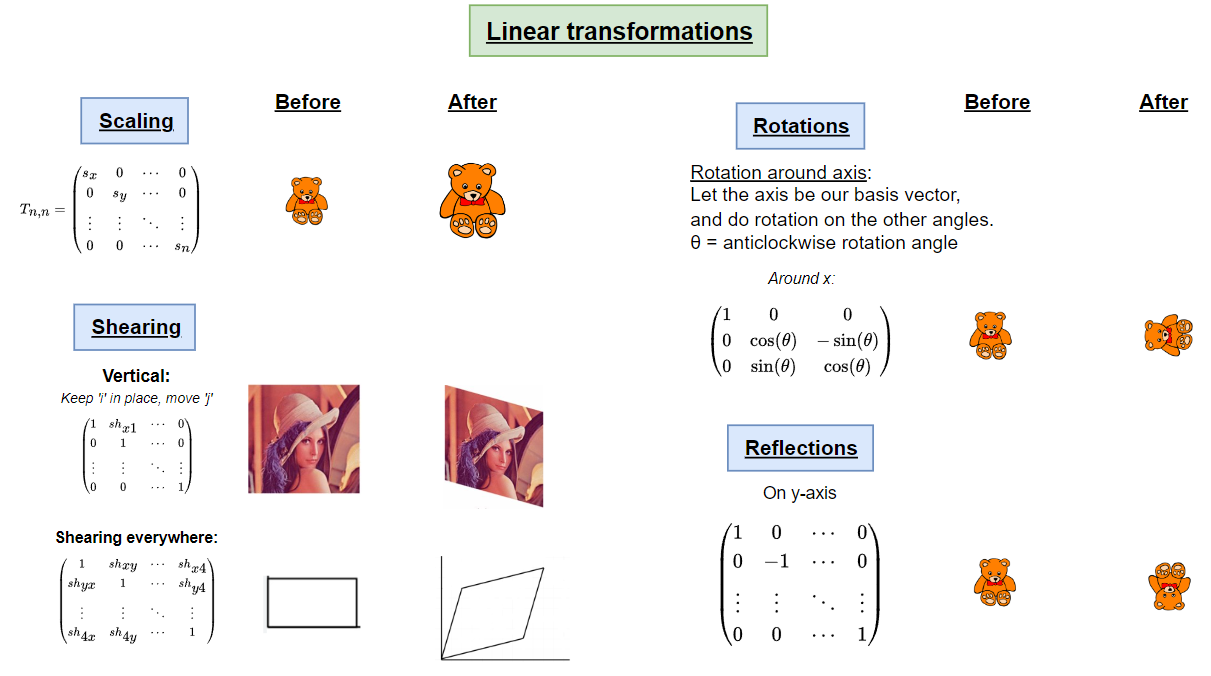

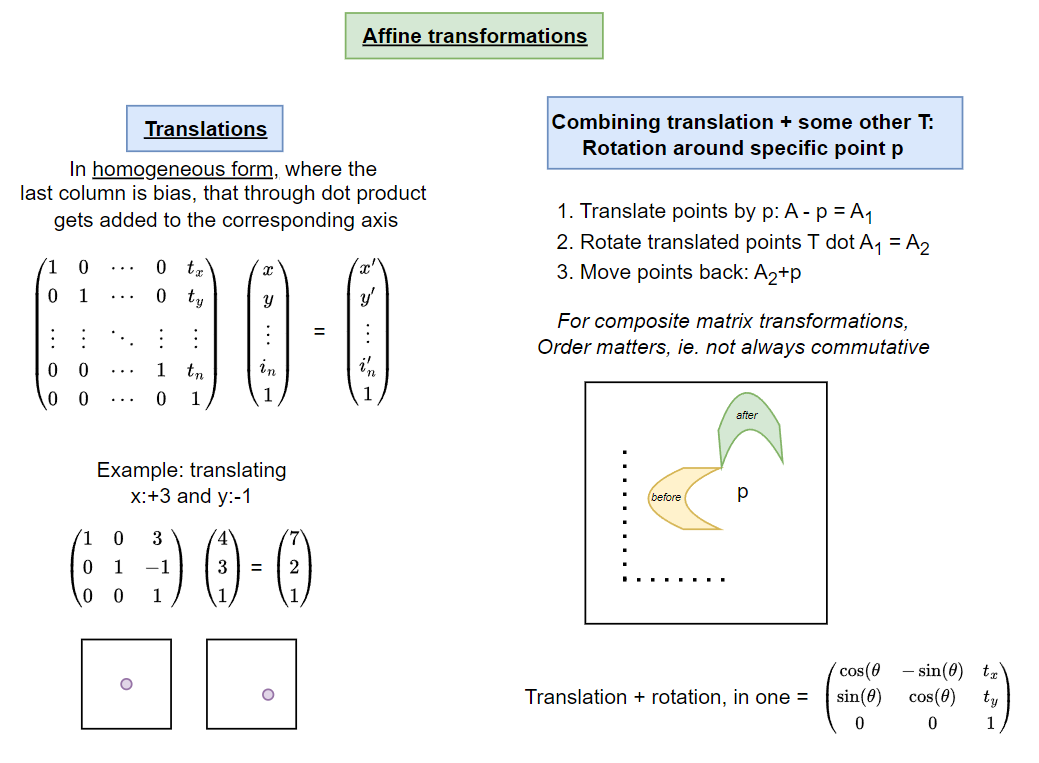

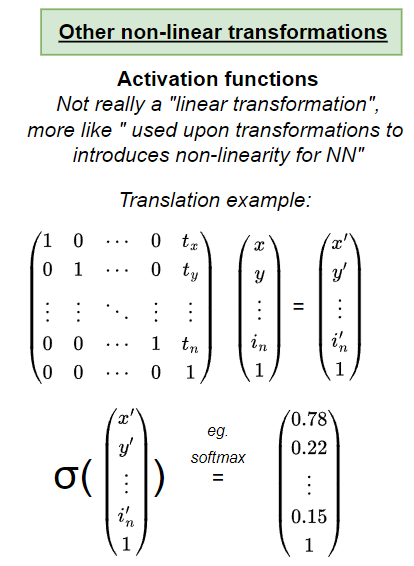

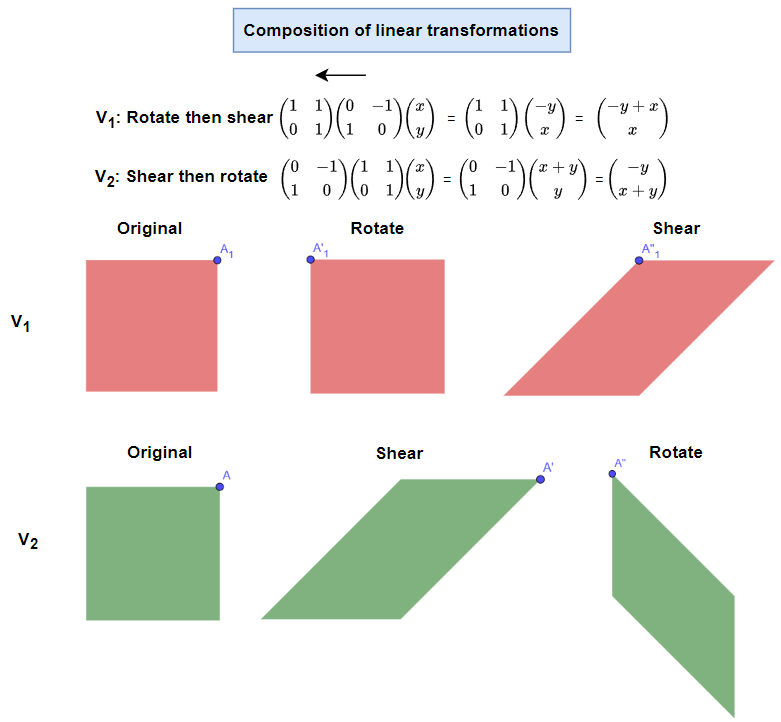

### Change of basis

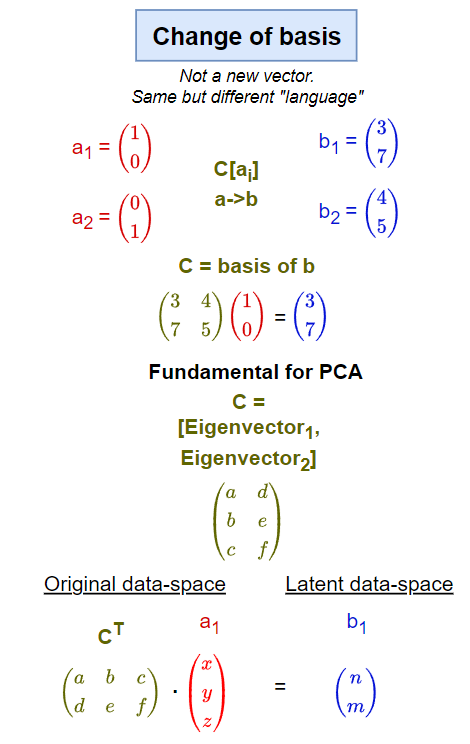
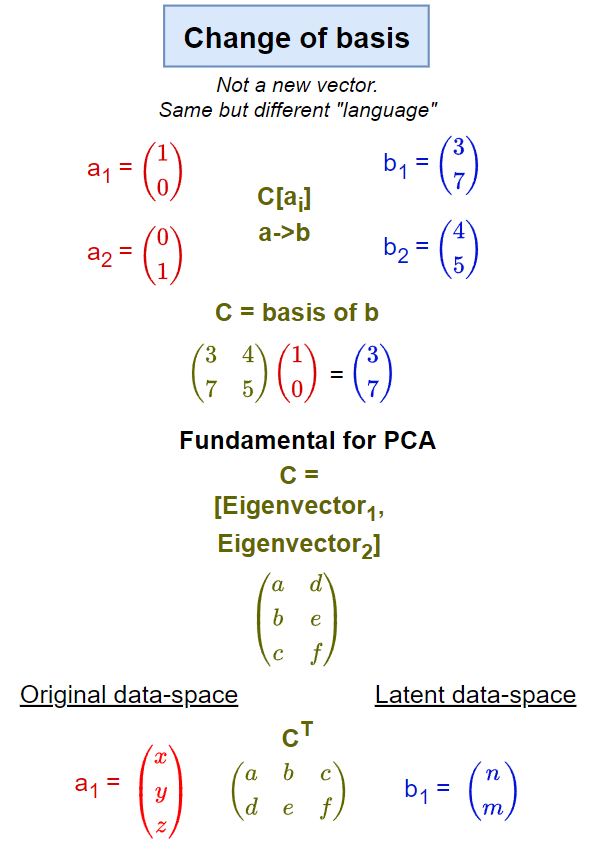

## Week 4C

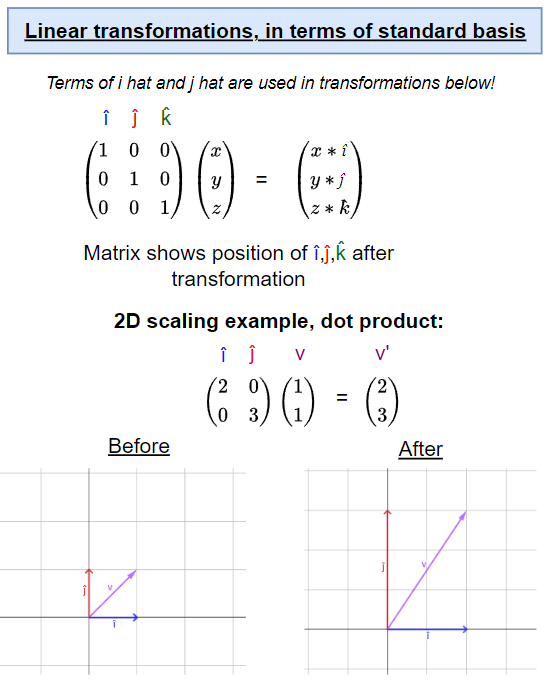

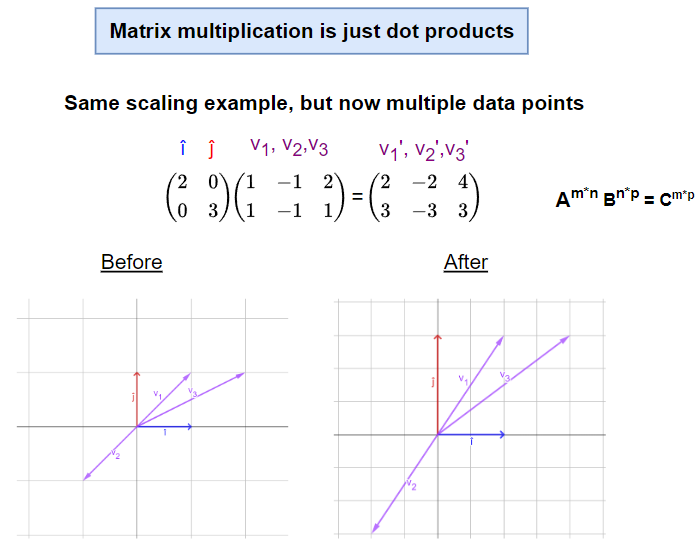

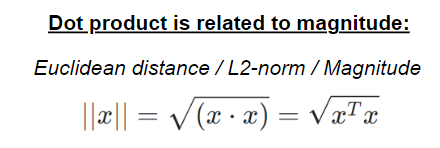

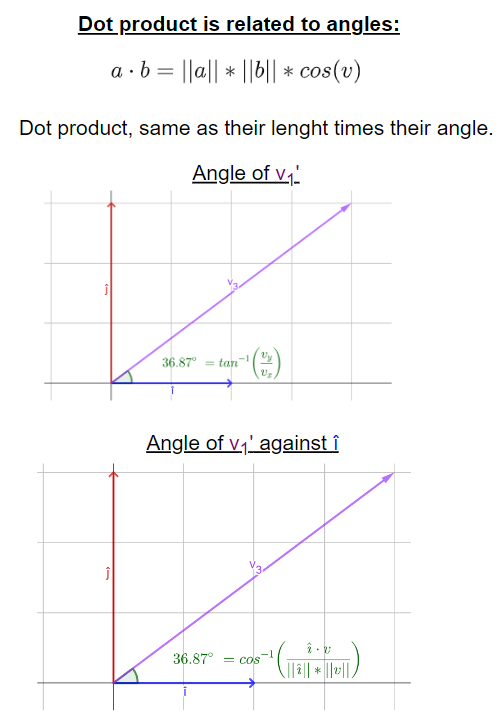